In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
import wikipedia as wk
import pandas_datareader as wb
import yfinance as yf

In [2]:
html = wk.page('List of S&P 500 companies').html().encode('UTF-8')

In [3]:
df = pd.read_html(html)[0]
df


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [4]:
sectores = list(set(df['GICS Sector']))

In [5]:
cal = 0
simbolos = df['Symbol'].tolist()

for i in simbolos:
    if i == 'CEG':
        simbolos.pop(cal)
    if i == 'BRK.B':
        simbolos[cal] = simbolos[cal].replace('.','-')
        print(simbolos[cal])
    if i == 'BF.B':
        simbolos[cal] = simbolos[cal].replace('.','-')
        print(simbolos[cal])
    cal += 1


BRK-B
BF-B


In [8]:
pruebayf = yf.download(tickers=simbolos, start='2000-01-01', end='2021-12-31', group_by='ticker')

[*********************100%***********************]  502 of 502 completed


In [9]:
pruebayf.T


Date            1999-12-31     2000-01-03     2000-01-04     2000-01-05  \
ZION Open              NaN      59.031250      54.625000      52.750000   
     High              NaN      59.125000      55.000000      53.250000   
     Low               NaN      53.437500      52.500000      51.062500   
     Close             NaN      55.500000      52.812500      52.750000   
     Adj Close         NaN      38.532928      36.667038      36.623634   
...                    ...            ...            ...            ...   
EFX  High              NaN      23.250000      22.250000      22.187500   
     Low               NaN      21.062500      21.562500      21.312500   
     Close             NaN      22.375000      21.625000      21.375000   
     Adj Close         NaN      10.742884      10.382784      10.262755   
     Volume            NaN  440100.000000  529100.000000  362400.000000   

Date               2000-01-06     2000-01-07     2000-01-10     2000-01-11  \
ZION Open           52.750000      53.750000      53.687500      52.687500   
     High           54.937500      54.250000      53.750000      53.000000   
     Low            52.375000      53.312500      51.500000      49.875000   
     Close          53.500000      53.625000      52.656250      49.875000   
     Adj Close      37.144348      37.231136      36.558556      34.627571   
...                       ...            ...            ...            ...   
EFX  High           21.625000      22.375000      22.187500      22.625000   
     Low            20.812500      21.062500      21.812500      21.875000   
     Close          21.125000      22.125000      21.937500      22.562500   
     Adj Close      10.142724      10.622854      10.532826      10.832908   
     Volume     491100.000000  357000.000000  270200.000000  478700.000000   

Date               2000-01-12     2000-01-13  ...     2021-12-16  \
ZION Open           50.500000      51.062500  ...      63.599998   
     High           50.750000      55.500000  ...      64.300003   
     Low            49.000000      51.000000  ...      62.779999   
     Close          50.312500      54.687500  ...      63.470001   
     Adj Close      34.931313      37.968830  ...      62.708363   
...                       ...            ...  ...            ...   
EFX  High           22.500000      21.562500  ...     295.709991   
     Low            21.062500      20.000000  ...     288.450012   
     Close          21.562500      20.312500  ...     290.239990   
     Adj Close      10.352781       9.752617  ...     289.132477   
     Volume     333100.000000  822600.000000  ...  682200.000000   

Date              2021-12-17     2021-12-20     2021-12-21     2021-12-22  \
ZION Open       6.336000e+01      60.230000      60.230000      61.290001   
     High       6.336000e+01      60.230000      61.799999      62.060001   
     Low        6.091000e+01      58.180000      60.230000      61.060001   
     Close      6.120000e+01      59.400002      61.650002      61.860001   
     Adj Close  6.046560e+01      58.687206      60.910202      61.117683   
...                      ...            ...            ...            ...   
EFX  High       2.893900e+02     277.459991     280.200012     283.750000   
     Low        2.757400e+02     270.440002     273.760010     279.170013   
     Close      2.766400e+02     275.970001     280.070007     283.399994   
     Adj Close  2.755844e+02     274.916931     279.001282     282.318573   
     Volume     2.286800e+06  874000.000000  661100.000000  418500.000000   

Date               2021-12-23     2021-12-27     2021-12-28     2021-12-29  \
ZION Open           62.419998      62.419998      62.810001      63.279999   
     High           63.090000      63.060001      63.529999      63.889999   
     Low            62.209999      61.720001      62.630001      62.740002   
     Close          62.360001      63.009998      63.110001      63.450001   
     Adj Close      61.611683 

In [10]:
newframe = pruebayf.copy()
newframe = newframe.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
newframe = newframe.reset_index()

In [56]:
newframe.index

RangeIndex(start=0, stop=2478155, step=1)

In [11]:
newframe['Dia'] = newframe['Date'].dt.day_name()

In [12]:
newframe['retornogaps'] = np.log(newframe.Open/newframe.Close.shift(1))
newframe['retornogaps'] = newframe['retornogaps'].fillna(0)

In [13]:
newframe['retornos_intra'] = np.log(newframe.Close/newframe.Open).fillna(0)

In [14]:
newframe['variaciones'] = newframe['Adj Close'].pct_change().fillna(0)

In [15]:
newframe['volatilidad'] = newframe['variaciones'].rolling(250).std()*100*(250)**0.5
newframe['volatilidad'] = newframe['volatilidad'].fillna(0)

In [16]:
newframe.columns


Index(['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Dia', 'retornogaps', 'retornos_intra', 'variaciones', 'volatilidad'],
      dtype='object')

In [26]:
industry = df[['Symbol','GICS Sector']]
empresa = df[['Symbol','Security']]

In [27]:
industry = industry.set_index('Symbol')
industry = industry.to_dict()
industry = industry.pop('GICS Sector')

In [28]:
empresa = empresa.set_index('Symbol')
empresa = empresa.to_dict()
empresa = empresa.pop('Security')


In [29]:
newframe['industry'] = newframe['Ticker'].map(industry)

In [30]:
newframe['Nombre'] = newframe['Ticker'].map(empresa)

In [31]:
newframe

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Dia,retornogaps,retornos_intra,variaciones,volatilidad,Nombre,industry
0,2000-01-03,A,44.221348,51.502148,56.464592,48.193848,56.330471,4674353.0,Monday,0.000000,-0.089612,0.000000,0.000000,Agilent Technologies,Health Care
1,2000-01-03,AAPL,0.854541,0.999442,1.004464,0.907924,0.936384,535796800.0,Monday,-4.007353,0.065171,-0.980676,0.000000,Apple Inc.,Information Technology
2,2000-01-03,ABC,3.016691,3.890625,3.937500,3.812500,3.875000,2784800.0,Monday,1.355104,0.004024,2.530190,0.000000,AmerisourceBergen,Health Care
3,2000-01-03,ABMD,18.250000,18.250000,18.656250,18.250000,18.515625,185600.0,Monday,1.560045,-0.014450,5.049675,0.000000,Abiomed,Health Care
4,2000-01-03,ABT,9.347850,15.711531,16.160433,15.599306,15.823756,10635087.0,Monday,-0.142653,-0.007117,-0.487789,0.000000,Abbott,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2478150,2021-12-30,YUM,137.071228,138.389999,139.149994,138.199997,138.699997,538500.0,Thursday,0.152350,-0.002238,0.158940,5119.000214,Yum! Brands,Consumer Discretionary
2478151,2021-12-30,ZBH,124.015045,124.533981,125.631065,124.339806,124.631065,1304701.0,Thursday,-0.104718,-0.000779,-0.095251,5120.183746,Zimmer Biomet,Health Care
2478152,2021-12-30,ZBRA,597.539978,597.539978,605.489990,596.159973,602.710022,87500.0,Thursday,1.576858,-0.008615,3.818286,5123.118476,Zebra Technologies,Information Technology
2478153,2021-12-30,ZION,62.372444,63.130001,64.120003,63.070000,63.450001,413100.0,Thursday,-2.242569,-0.005056,-0.895618,5127.689648,Zions Bancorporation,Financials


In [32]:
retornogaps_sector = pd.DataFrame()

for i in range(len(sectores)):
    x = pd.DataFrame(newframe['retornogaps'][newframe['industry'] == str(sectores[i])]).sum()
    retornogaps_sector = pd.concat([retornogaps_sector, x], axis=1)
retornogaps_sector.columns = sectores
retornogaps_sector = retornogaps_sector.T



In [33]:
retornogaps_sector

,retornogaps
Information Technology,-75725.389819
Industrials,21001.425405
Consumer Staples,6228.458824
Health Care,68859.474707
Energy,-14404.530509
Materials,18545.209197
Utilities,-37795.063833
Consumer Discretionary,-9420.556537
Financials,9650.828246
Communication Services,-23988.561347


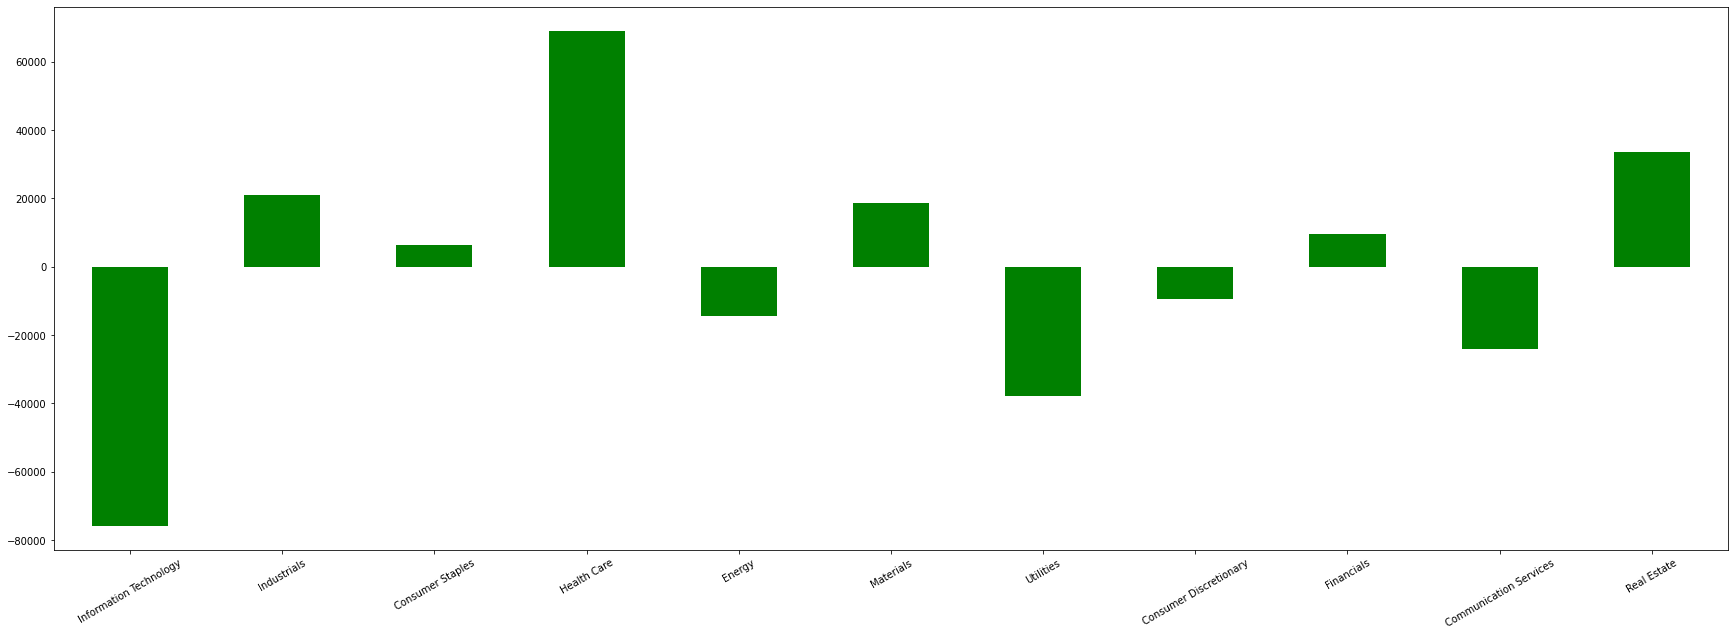

In [34]:
retornogaps_sector.plot(kind='bar',figsize=(30,10),rot=30,color='green',legend=False)
plt.show()

In [35]:
retornointra_sector = pd.DataFrame()

for i in range(len(sectores)):
    x = pd.DataFrame(newframe['retornos_intra'][newframe['industry'] == str(sectores[i])]).sum()
    retornointra_sector = pd.concat([retornointra_sector, x], axis=1)
retornointra_sector.columns = sectores
retornointra_sector = retornointra_sector.T


In [36]:
retornointra_sector

,retornos_intra
Information Technology,76.292306
Industrials,89.190735
Consumer Staples,61.204932
Health Care,104.618158
Energy,-31.213501
Materials,6.587956
Utilities,32.008490
Consumer Discretionary,30.373829
Financials,45.206370
Communication Services,1.588670


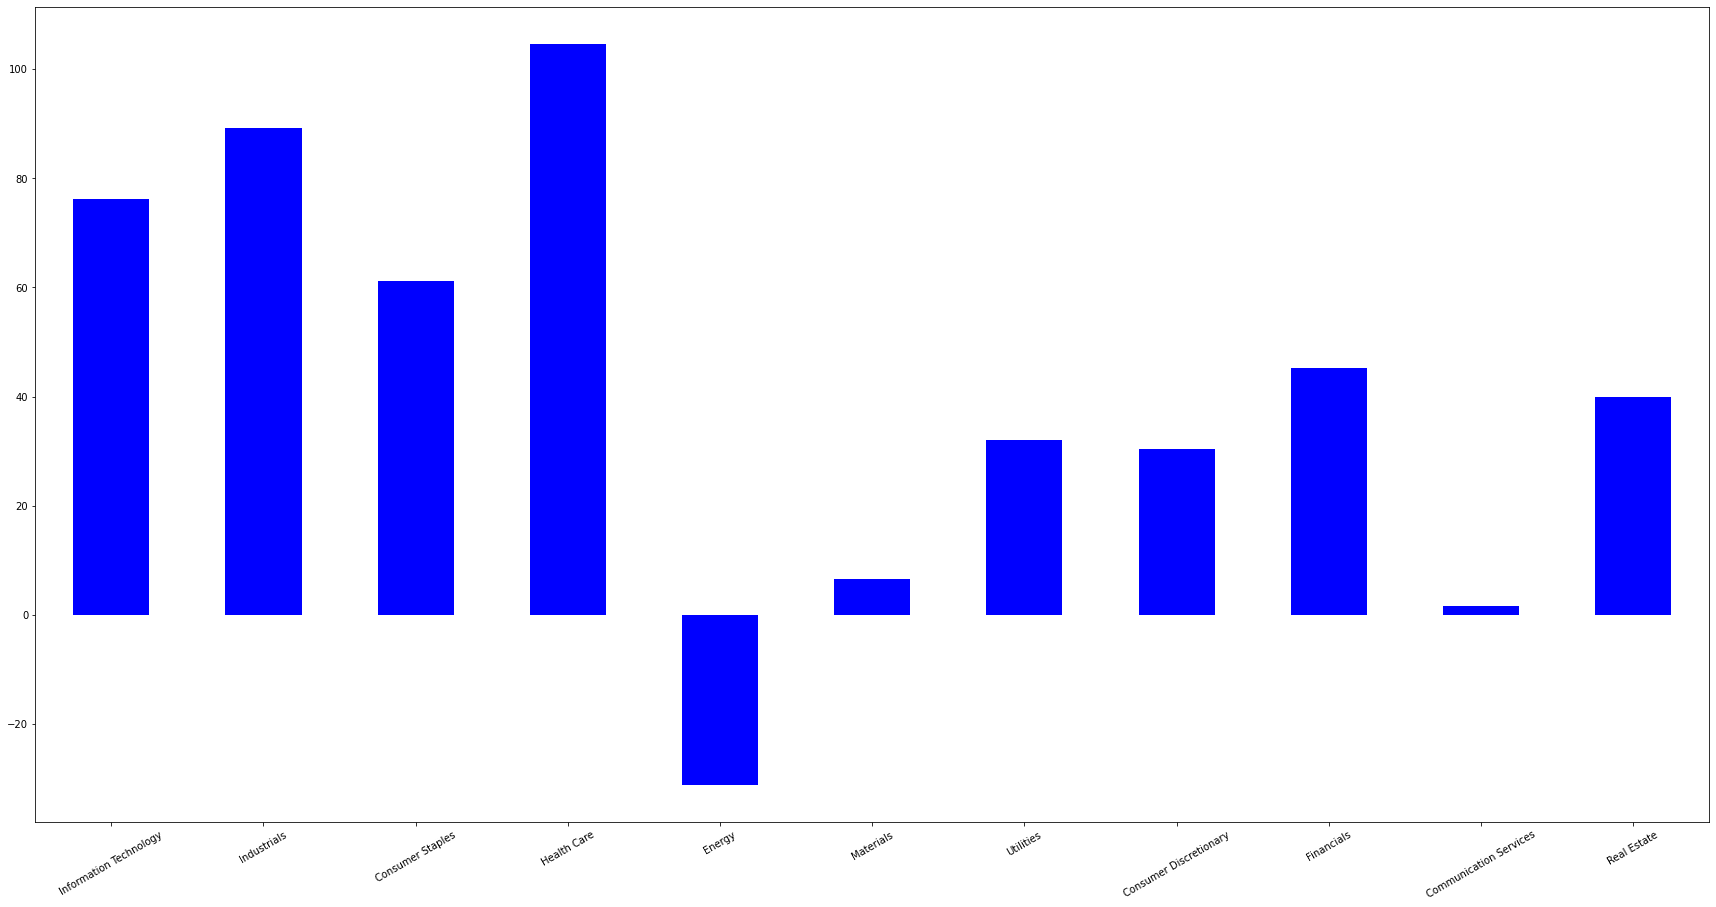

In [37]:
retornointra_sector.plot(kind='bar',figsize=(30,15),rot=30,color='blue',legend=False)
plt.show()

Segun los retornos intradiarios y gap, las mejores sectores para invertir en el SP500 son Health Care e Industrials

In [42]:
dias = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [48]:
newframe_dias = newframe.copy()
newframe_dias_gap= newframe_dias.groupby('Dia')[['retornogaps']].sum()
newframe_dias_gap = newframe_dias_gap.reindex(dias)
newframe_dias_intra = newframe_dias.groupby('Dia')[['retornos_intra']].sum()
newframe_dias_intra = newframe_dias_intra.reindex(dias)

In [45]:
newframe_dias_gap

,retornogaps
Dia,
Monday,141.825749
Tuesday,-94.767520
Wednesday,-121.120867
Thursday,-258.543419
Friday,-123.403424


In [49]:
newframe_dias_intra

,retornos_intra
Dia,
Monday,-143.312977
Tuesday,95.128614
Wednesday,121.532627
Thursday,259.974232
Friday,124.157661


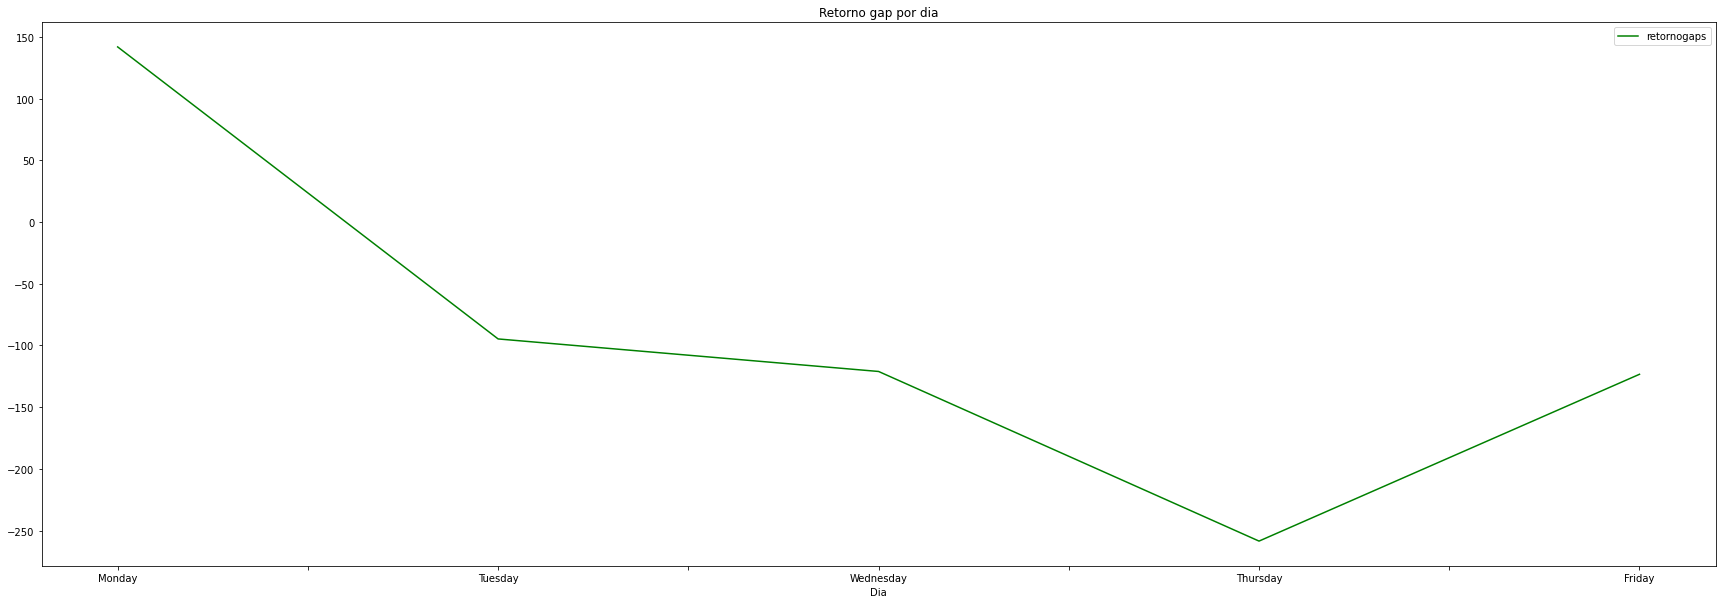

In [108]:
newframe_dias_gap.plot.line(figsize=(30,10),color='green')
plt.title('Retorno gap por dia')
plt.show()

Basandono en el anterior grafico, el mejor dia para invertir teniendo en cuenta los retornos gap, es, los jueves

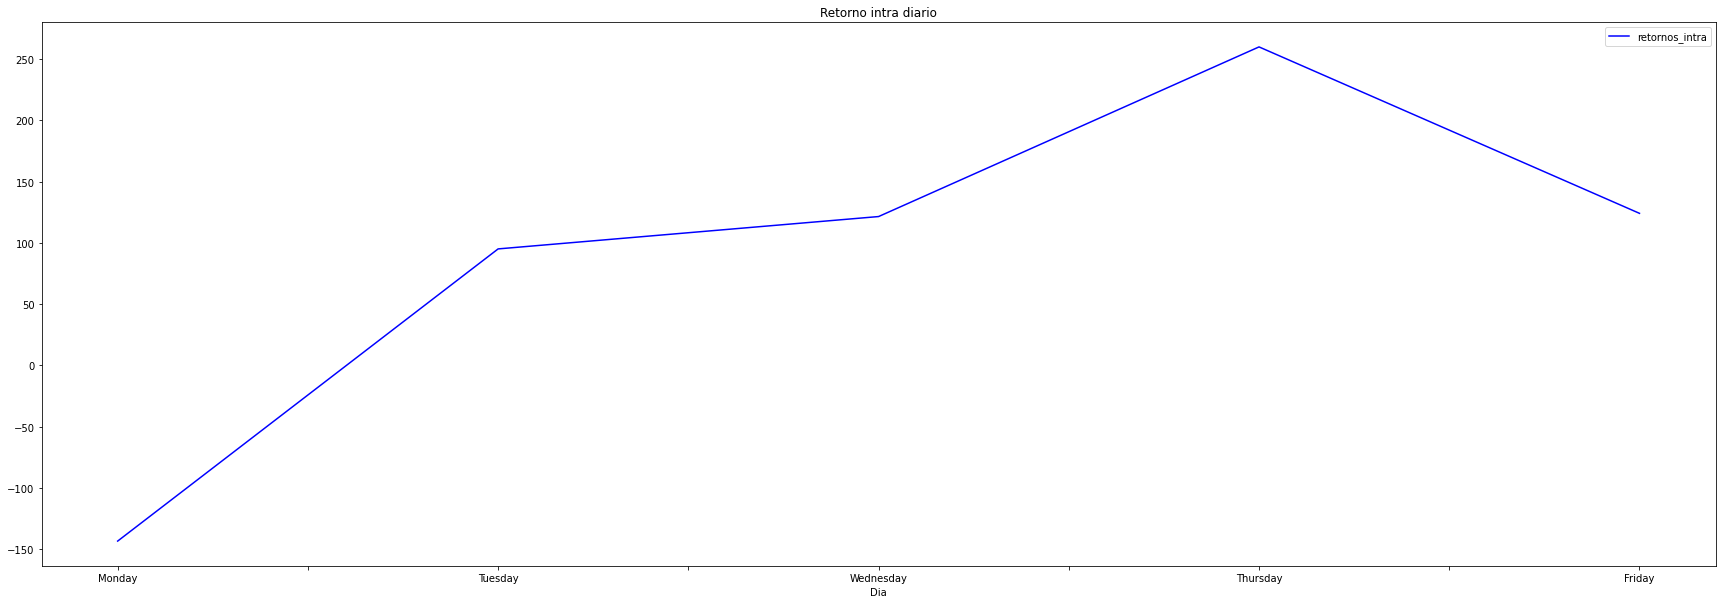

In [107]:
newframe_dias_intra.plot.line(figsize=(30,10),color='blue')
plt.title('Retorno intra diario')
plt.show()

Basandono en el anterior grafico, el mejor dia para invertir teniendo en cuenta los retornos intradiarios, es, los lunes/martes


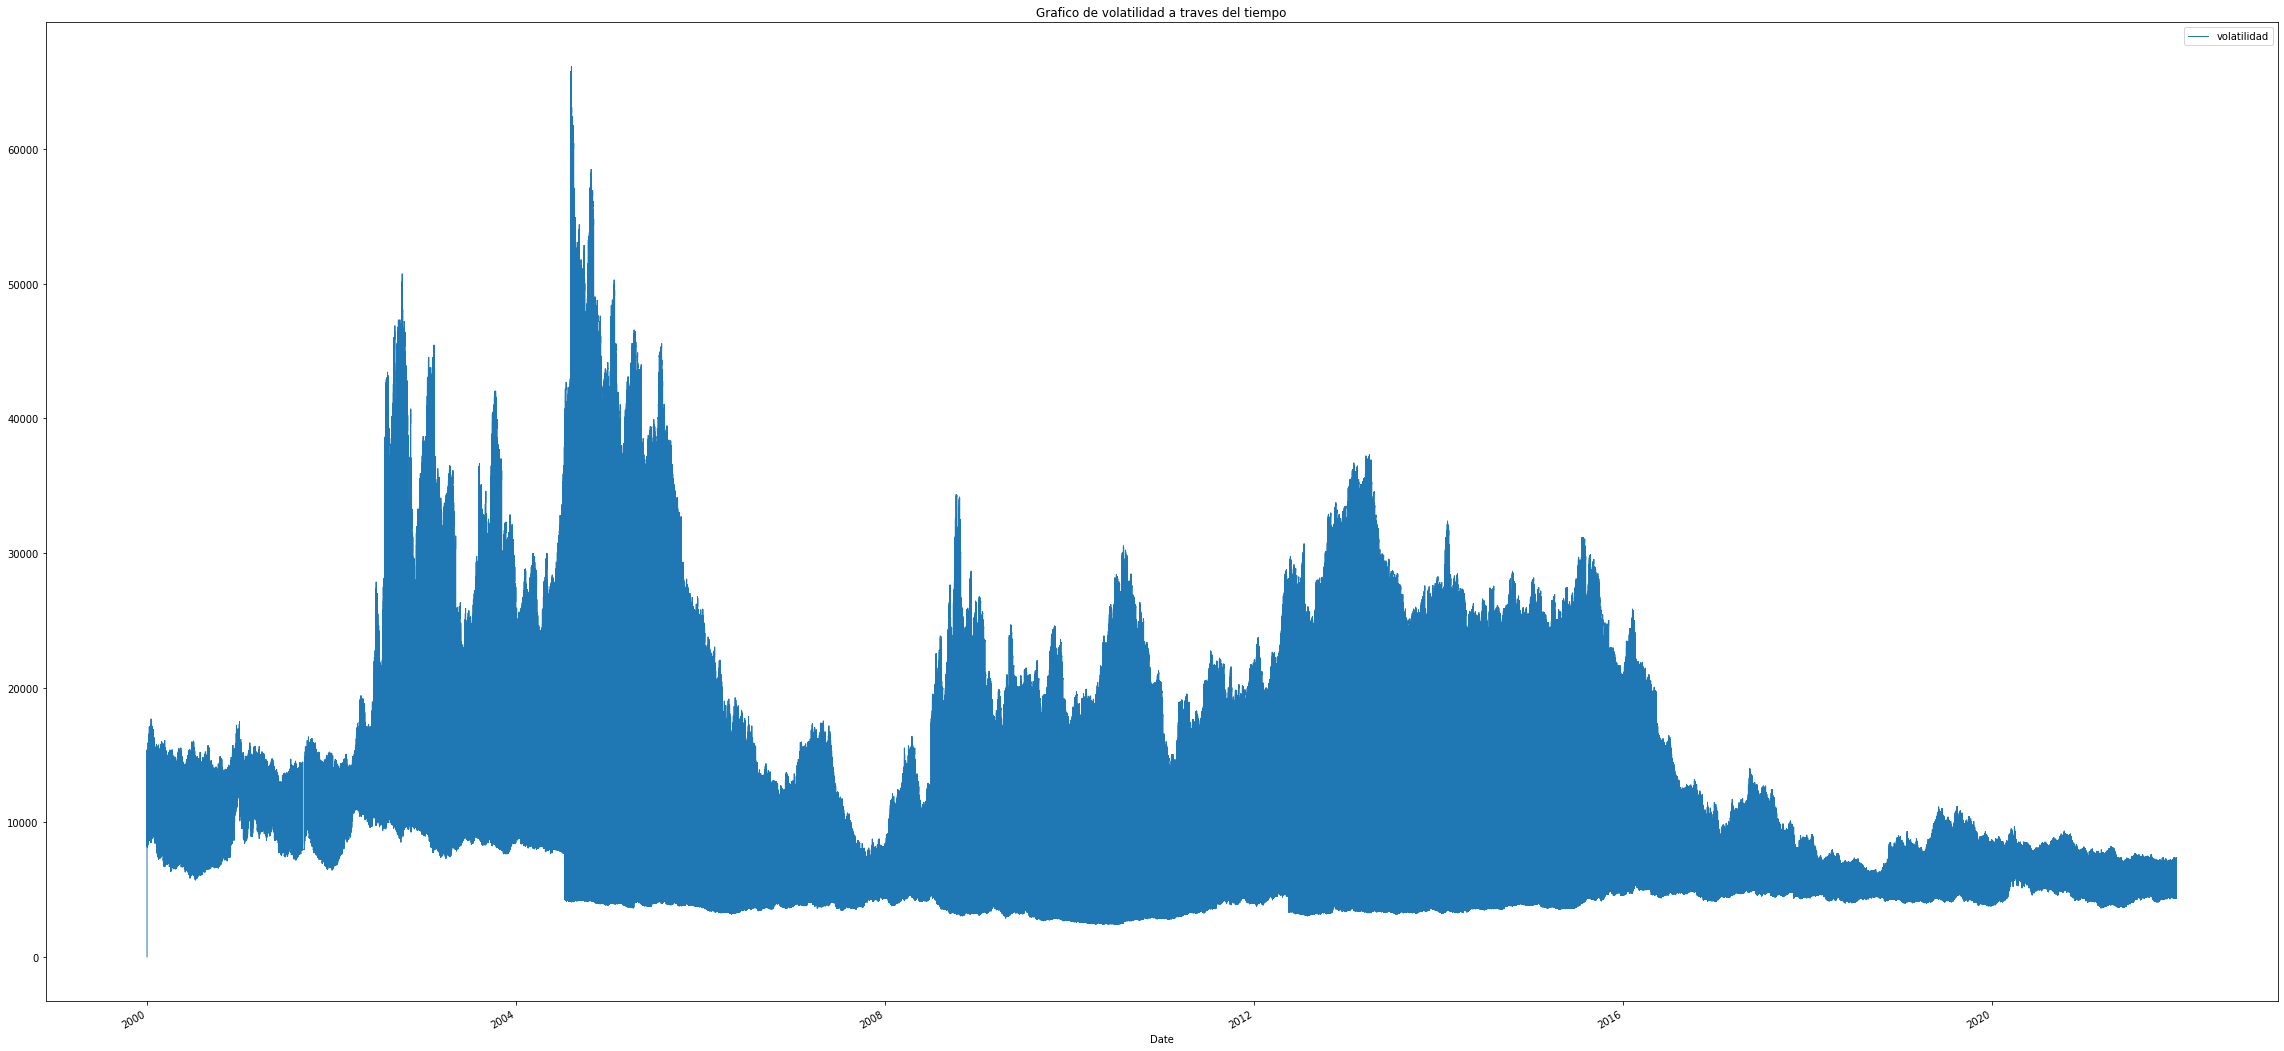

In [109]:
newframe.plot.line(x='Date',y='volatilidad',figsize=(40,20),lw=1)
plt.title('Grafico de volatilidad a traves del tiempo')
plt.show()

El momento de mayor volatilidad se dio a mediados de 2004, lo cual tuvo una fuerte repercusion en el mercado que se vio reflejada en el 2008

In [130]:
newframe[newframe['volatilidad'] > 60000].head(10)

,Date,Ticker,Adj Close,Close,High,Low,Open,Volume,Dia,retornogaps,retornos_intra,variaciones,volatilidad,industry
447305,2004-08-06,NVR,475.000000,475.000000,477.000000,472.000000,477.000000,35000.0,Friday,6.408527,-0.004202,657.260515,65772.698352,Consumer Discretionary
447306,2004-08-06,NWL,11.927560,20.809999,21.000000,20.520000,20.600000,1214800.0,Friday,-3.138024,0.010143,-0.974889,65773.223176,Consumer Discretionary
447307,2004-08-06,O,7.865171,19.636627,19.970930,19.534883,19.718992,297629.0,Friday,-0.053851,-0.004186,-0.340588,65773.282442,Real Estate
447308,2004-08-06,ODFL,5.138103,5.244444,5.341235,4.801975,5.333333,2700338.0,Friday,-1.303420,-0.016807,-0.346727,65773.431724,Industrials
447309,2004-08-06,OKE,4.138037,9.757486,9.853791,9.722465,9.792506,1035519.0,Friday,0.624448,-0.003583,-0.194637,65773.676008,Energy
447310,2004-08-06,OMC,21.829615,33.845001,34.500000,33.845001,34.500000,2314400.0,Friday,1.262925,-0.019168,4.275355,65772.408668,Communication Services
447311,2004-08-06,ON,3.480000,3.480000,3.630000,3.400000,3.550000,5012500.0,Friday,-2.254844,-0.019915,-0.840584,65773.363444,Information Technology
447312,2004-08-06,ORCL,8.559540,10.190000,10.540000,10.190000,10.430000,38588500.0,Friday,1.097654,-0.023279,1.459638,65772.424099,Information Technology
447313,2004-08-06,ORLY,18.719999,18.719999,18.760000,18.030001,18.500000,921800.0,Friday,0.596364,0.011822,1.187033,65771.866139,Consumer Discretionary
447314,2004-08-06,OXY,13.992390,22.969522,23.477295,22.878508,23.472506,3925009.0,Friday,0.226237,-0.021662,-0.252543,65771.826880,Energy


In [100]:
top_retorno_intra= newframe.groupby(['Ticker','Nombre']).retornos_intra.sum()
top_retorno_intra= top_retorno_intra.to_frame()
top_retorno_intra.sort_values(by=['retornos_intra'], inplace=True, ascending=False)
top_retorno_intra = top_retorno_intra.head(13)

In [113]:
colores=['red','blue','green','grey','orange','yellow','cyan']

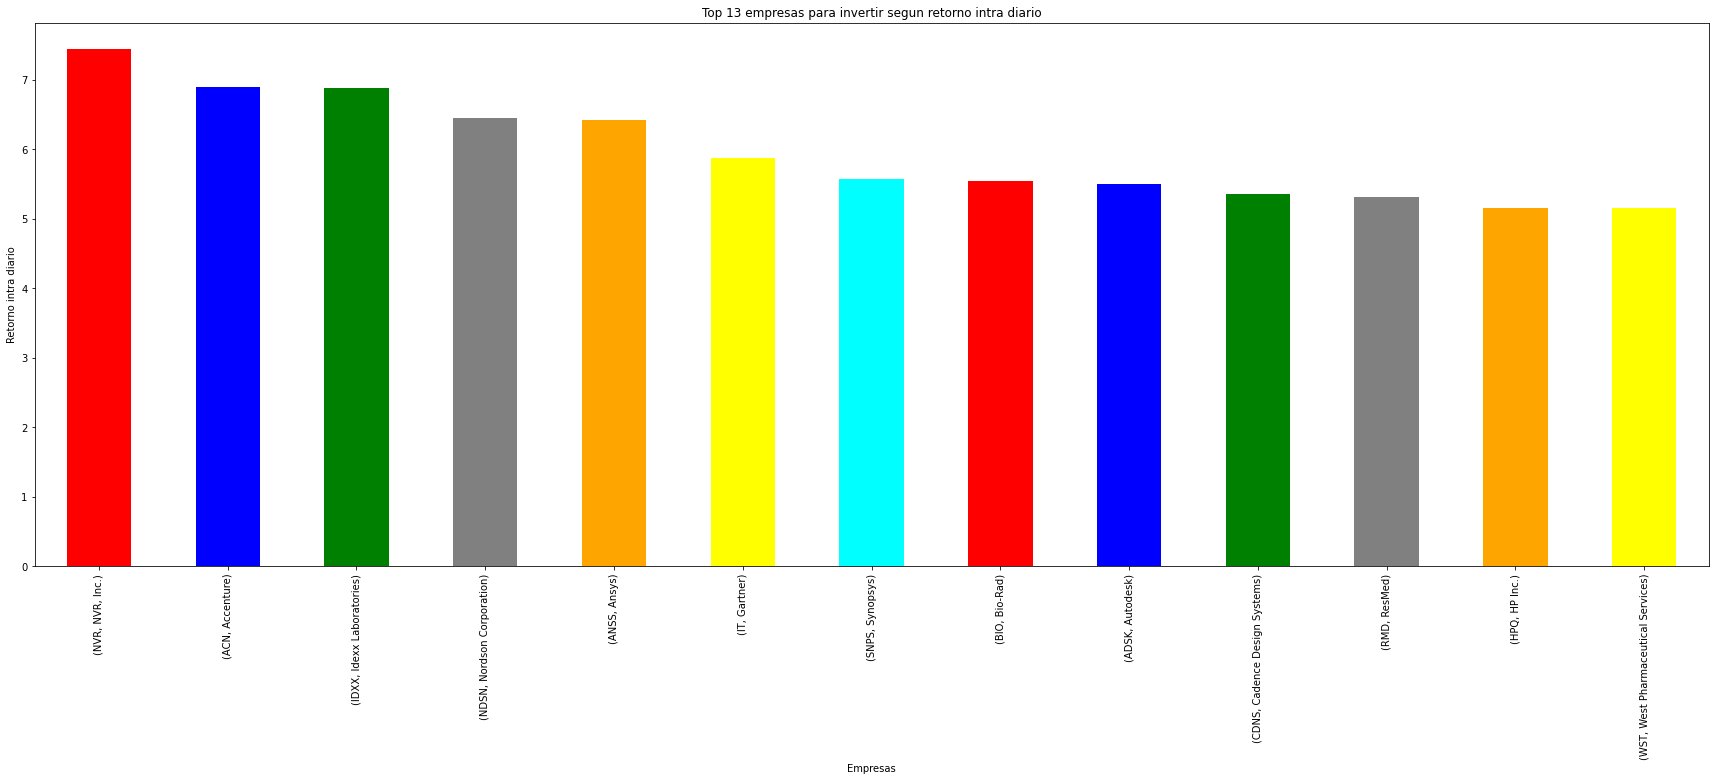

In [115]:
top_retorno_intra.plot(kind='bar',figsize=(30,10),y='retornos_intra',
                        xlabel='Empresas', ylabel='Retorno intra diario', legend=False,
                        color=colores
)
plt.title('Top 13 empresas para invertir segun retorno intra diario')
plt.show()

Las mejores empresas para invertir segun el retorno intradiario serian: 1- NVR, Inc; 2-Accenture; 3-Idexx Laboratories; 4-Nordson Corporation, 5-Ansys; 6-Gartner; 7-Synopsys; 8-Bio-Rad; 9-Autodesk	

In [105]:
top_retorno_intra

,,retornos_intra
Ticker,Nombre,
NVR,"NVR, Inc.",7.449977
ACN,Accenture,6.895825
IDXX,Idexx Laboratories,6.888662
NDSN,Nordson Corporation,6.457005
ANSS,Ansys,6.423878
IT,Gartner,5.870560
SNPS,Synopsys,5.573406
BIO,Bio-Rad,5.538290
ADSK,Autodesk,5.497662


In [110]:
top_retorno_gap= newframe.groupby(['Ticker','Nombre']).retornogaps.sum()
top_retorno_gap= top_retorno_gap.to_frame()
top_retorno_gap.sort_values(by=['retornogaps'], inplace=True, ascending=False)
top_retorno_gap = top_retorno_gap.head(13)

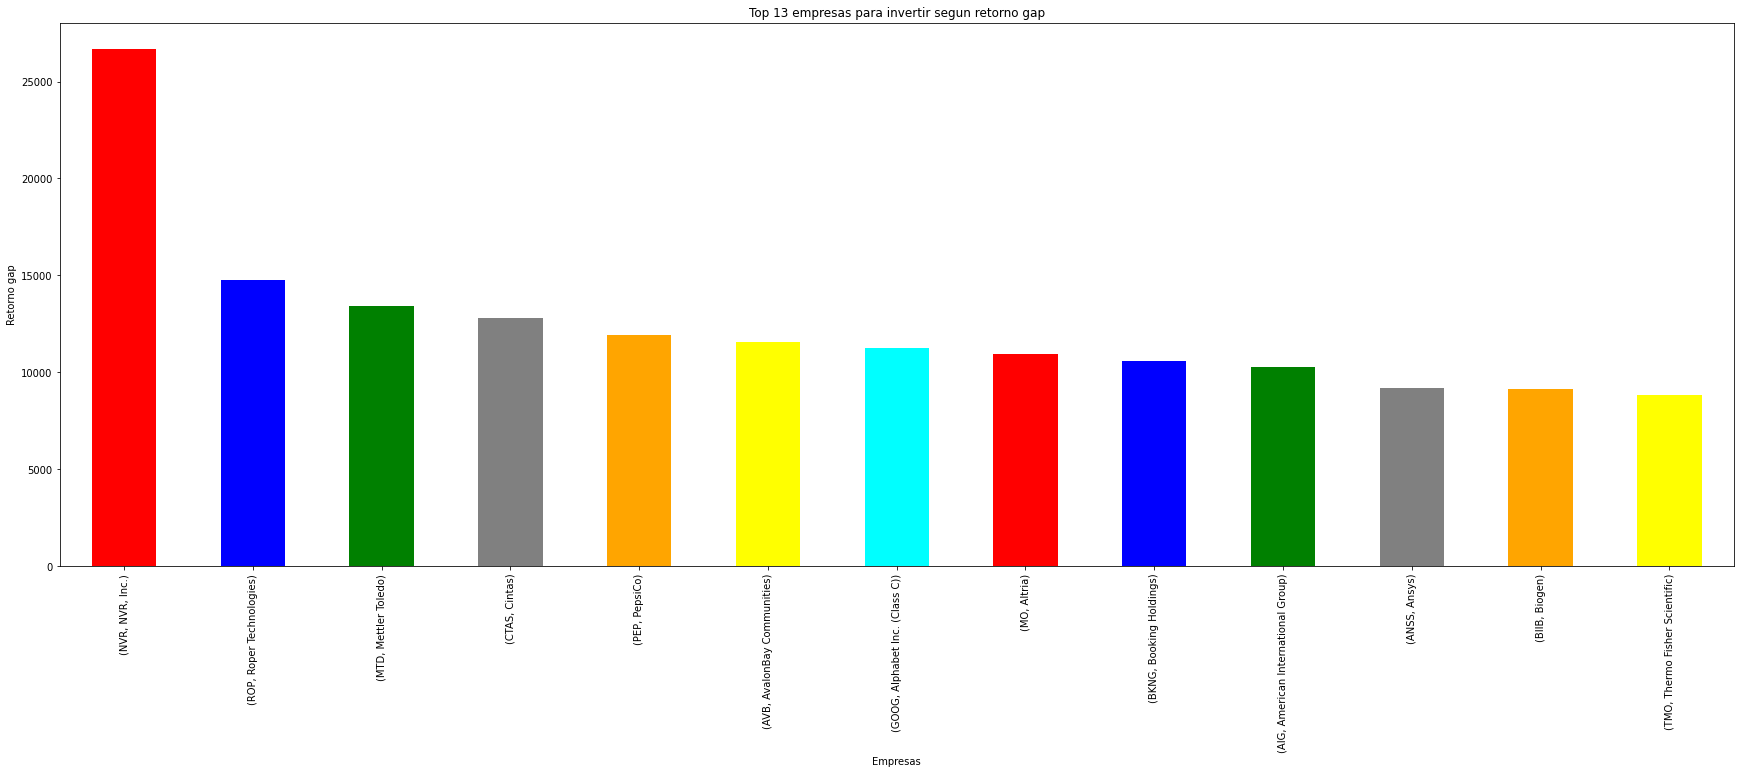

In [119]:
top_retorno_gap.plot(kind='bar',figsize=(30,10),y='retornogaps',
                        xlabel='Empresas', ylabel='Retorno gap', legend=False,
                        color=colores
)
plt.title('Top 13 empresas para invertir segun retorno gap')
plt.show()

Las mejores empresas para invertir segun el retorno gap serian: 1- NVR, Inc; 2-Roper Technologies; 3-Mettler Toledo; 4-Cintas; 5-PepsiCo; 6-AvalonBay Communities; 7-Alphabet Inc. (Class C); 8-Altria; 9-Booking Holdings	

In [111]:
top_retorno_gap

,,retornogaps
Ticker,Nombre,
NVR,"NVR, Inc.",26699.706120
ROP,Roper Technologies,14787.007210
MTD,Mettler Toledo,13417.142067
CTAS,Cintas,12798.063387
PEP,PepsiCo,11941.296492
AVB,AvalonBay Communities,11561.074677
GOOG,Alphabet Inc. (Class C),11245.059197
MO,Altria,10955.735576
BKNG,Booking Holdings,10591.997303
